<a href="https://colab.research.google.com/github/alperbayram/TurkishNLP/blob/main/Twitter_Sentiment_Analysis_and_Text_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
!pip install transformers

In [128]:
!pip install nest-asyncio

In [1]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

fatal: destination path 'twint' already exists and is not an empty directory.
/content/twint
Processing /content/twint
  Created wheel for twint: filename=twint-2.1.21-cp37-none-any.whl size=38872 sha256=ad6a32e39e85faf572e789f49f81bdce9b5fcd737a38c3e51668f5c82ef968b0
  Stored in directory: /tmp/pip-ephem-wheel-cache-vnpmj7bp/wheels/c9/bb/bd/2b559954ecc4f4905266df71e9f2e08268750df0fa1ec1a4d2
Successfully built twint
  Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21


In [2]:
import os
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import csv
from openpyxl import Workbook
from datetime import datetime
import seaborn as sns
from scipy import stats
from PIL import Image
from warnings import filterwarnings
filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [3]:
from pandas import Series, DataFrame
from datetime import datetime

In [4]:
now = datetime.now()
date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
print("date and time:",date_time)

date and time: 06/03/2021, 21:56:47


In [5]:
import nest_asyncio
nest_asyncio.apply()# Jupyter not defterinde eşzamanlı eylemleri etkinleştirmek için bir kez kullanıldı.

# [**Twint**](https://github.com/twintproject/twint)
Python'da yazılmış, Twitter'ın API'sini kullanmayan gelişmiş bir Twitter kazıma ve OSINT aracı, çoğu API sınırlamasından kaçarken bir kullanıcının takipçilerini, takiplerini, Tweetlerini ve daha fazlasını kazımanıza olanak tanır.

In [6]:
import twint
   
print ("tweet alınıyor...")
c = twint.Config()
# kullanıcı adı giriniz
#c.Username = input('Username: ') 
c.Username = 'TwiterSonDakika'
c.Custom["tweet"] = ["date", "username","hour"]
c.Since = '2021-05-20'
c.until= '2021-06-01'
c.Pandas = True
twint.run.Search(c)
Tweets_df = twint.storage.panda.Tweets_df




tweet alınıyor...
1400571745787056137 2021-06-03 21:55:00 +0000 <TwiterSonDakika> Ünlülerin eğlencesine polis baskını  https://t.co/AgZ7dFFsu6
1400570487869042690 2021-06-03 21:50:00 +0000 <TwiterSonDakika> Boşandığı kadını öldüresiye döven İbrahim Zarap'a 10 yıl hapis cezası  https://t.co/vuUMwCipyH
1400569229166977024 2021-06-03 21:45:00 +0000 <TwiterSonDakika> GAP gümrük kapılarında 40 milyon liralık kaçak eşya ele geçirildi  https://t.co/5wAFaNwWZO
1400565455895498753 2021-06-03 21:30:00 +0000 <TwiterSonDakika> Çamlıca Kulesi'ne giriş ücreti ve kafe-restoran fiyatları belli oldu  https://t.co/c2ffiUrluv
1400564447744118785 2021-06-03 21:26:00 +0000 <TwiterSonDakika> 'Doğrusunu benden duyun' dedi ve açıkladı: Şeyma Subaşı hamile diyenler...  https://t.co/7hlBDr5cOl
1400564196228669441 2021-06-03 21:25:00 +0000 <TwiterSonDakika> Uyurken diş sıkmak yüz genişlemesi nedeni  https://t.co/upVyckE0s9
1400561679830683648 2021-06-03 21:15:00 +0000 <TwiterSonDakika> Sivas'ta katliam gibi kaza

In [7]:
Tweets_df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1400571745787056137,1400571745787056137,1.622757e+12,2021-06-03 21:55:00,+0000,,Ünlülerin eğlencesine polis baskını https://t...,tr,[],[],480630399,480630399,TwiterSonDakika,Son Dakika Haberleri,4,21,https://twitter.com/TwiterSonDakika/status/140...,[http://dlvr.it/S0zd1Q],[],0,,False,0,0,0,,None,,,,,,,[],,,,
1,1400570487869042690,1400570487869042690,1.622757e+12,2021-06-03 21:50:00,+0000,,Boşandığı kadını öldüresiye döven İbrahim Zara...,tr,[],[],480630399,480630399,TwiterSonDakika,Son Dakika Haberleri,4,21,https://twitter.com/TwiterSonDakika/status/140...,[http://dlvr.it/S1086f],[],0,,False,4,0,1,,None,,,,,,,[],,,,
2,1400569229166977024,1400569229166977024,1.622757e+12,2021-06-03 21:45:00,+0000,,GAP gümrük kapılarında 40 milyon liralık kaçak...,tr,[],[],480630399,480630399,TwiterSonDakika,Son Dakika Haberleri,4,21,https://twitter.com/TwiterSonDakika/status/140...,[http://dlvr.it/S0zVkv],[],0,,False,2,0,0,,None,,,,,,,[],,,,
3,1400565455895498753,1400565455895498753,1.622756e+12,2021-06-03 21:30:00,+0000,,Çamlıca Kulesi'ne giriş ücreti ve kafe-restora...,tr,[],[],480630399,480630399,TwiterSonDakika,Son Dakika Haberleri,4,21,https://twitter.com/TwiterSonDakika/status/140...,[http://dlvr.it/S0zDdy],[],0,,False,3,0,0,,None,,,,,,,[],,,,
4,1400564447744118785,1400564447744118785,1.622756e+12,2021-06-03 21:26:00,+0000,,'Doğrusunu benden duyun' dedi ve açıkladı: Şey...,tr,[],[],480630399,480630399,TwiterSonDakika,Son Dakika Haberleri,4,21,https://twitter.com/TwiterSonDakika/status/140...,[https://www.sondakikaturk.com.tr/dogrusunu-be...,[],0,,False,2,1,0,,None,,,,,,,[],,,,


In [8]:
df_Tweetler=Tweets_df.filter(items=['hour','tweet'])
df_Tweets = pd.DataFrame(df_Tweetler)

In [9]:
df_Tweets

,hour,tweet
0,21,Ünlülerin eğlencesine polis baskını https://t...
1,21,Boşandığı kadını öldüresiye döven İbrahim Zara...
2,21,GAP gümrük kapılarında 40 milyon liralık kaçak...
3,21,Çamlıca Kulesi'ne giriş ücreti ve kafe-restora...
4,21,'Doğrusunu benden duyun' dedi ve açıkladı: Şey...
...,...,...
2622,00,En çok vaka düşüşü yaşanan kentte pazarcılarda...
2623,00,Hindistan’da Covid-19 salgında yeni rekor: son...
2624,00,İzmir’de 2 kişinin öldüğü olayla ilgili 2 tutu...
2625,00,"Alkollü sürücü ""dur"" ihtarına uymadı, otomobil..."


In [10]:
TweetSayisi=len(df_Tweets)
print("Tweet Sayisi :",TweetSayisi)

Tweet Sayisi : 2627


# Tweetlerin Atılan Saatlere Göre Oranı

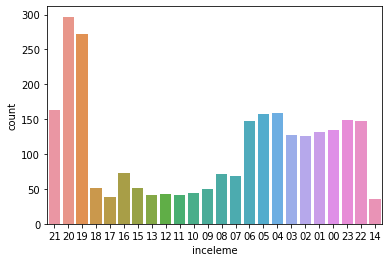

In [11]:
sns.countplot(df_Tweets['hour'])
plt.xlabel('inceleme');

In [12]:
# x=500
# Tweetler=list()
# for i in range(x):
#  df_Tweets = df_Tweetler.tweet[i]
#  Tweetler.append(df_Tweets)
#  #print(i)

In [13]:
#len(Tweetler)

In [14]:
# df_Tweetss = pd.DataFrame(Tweetler)
# df_Tweetsler = df_Tweetss.rename(columns = {0: 'tweet'}, inplace = False)
# df_Tweetsler 

In [15]:
#df_Tweetss.info() 

# Tweetlerin Temizlenmesi 

In [16]:
#noktalama işaretleri
df_Tweets["tweet"] = df_Tweets["tweet"].str.replace('[^\w\s]','')
# #sayılar
df_Tweets["tweet"]= df_Tweets["tweet"].str.replace('\d','')
# df_Tweetler["Tweets"]= df_Tweetler["Tweets"].str.replace('(?:\@|http?\://|https?\://|www\S+)','')
df_Tweets["tweet"]= df_Tweets["tweet"].str.replace('@[A-Za-z0-9]+','')
df_Tweets["tweet"] =df_Tweets["tweet"].str.replace('http\S+','')

In [17]:
df_Tweets["tweet"]

0                   Ünlülerin eğlencesine polis baskını  
1       Boşandığı kadını öldüresiye döven İbrahim Zara...
2       GAP gümrük kapılarında  milyon liralık kaçak e...
3       Çamlıca Kulesine giriş ücreti ve kaferestoran ...
4       Doğrusunu benden duyun dedi ve açıkladı Şeyma ...
                              ...                        
2622    En çok vaka düşüşü yaşanan kentte pazarcılarda...
2623    Hindistanda Covid salgında yeni rekor son  saa...
2624    İzmirde  kişinin öldüğü olayla ilgili  tutukla...
2625    Alkollü sürücü dur ihtarına uymadı otomobili p...
2626    İçişleri Bakanı Süleyman Soyludan Hadi Özışık ...
Name: tweet, Length: 2627, dtype: object

In [18]:
text = " ".join(review for review in df_Tweets.tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 172127 words in the combination of all review.


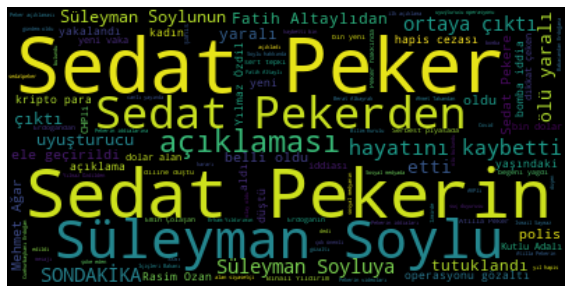

In [19]:

stopwords = set(STOPWORDS)
stopwords.update(["ben", "sen", "biz", "de", "ki", "ve", "da", "bir", "ile", "için", "bu", "ne", "gibi","amk"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [20]:
from google.colab import drive

data_path =  "/resource/"

try:
    drive.mount('/content/drive')
    data_path = "/content/drive/My Drive/resource/"

except:
    print("You are not working in Colab at the moment :(")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
wordcloud.to_file("/content/drive/My Drive/img/kelimebulutu.png")

# **DUYGU ANALİZİ KISMI BERT MODELLERİNİN YÜKLENMESİ**

In [22]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer, AutoModelForSequenceClassification

In [23]:
tokenizer= AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
model= AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

In [24]:
analysis=pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [26]:
analysis("allah belanı versin. ")

[{'label': 'negative', 'score': 0.9647771716117859}]

In [27]:
code_to_label={
 'negative': 'negatif',
 'positive': 'pozitif',
    'notr': 'notr'
    
}

In [28]:
Tweet = list(df_Tweets['tweet'])
#Tweet

# **Tweeetlerin tek tek gezilmesi ve sonuçların ve scorun boş diziye aktarılması**

In [29]:
d= list()
k= list()
for i in range(TweetSayisi):
                    c= analysis(Tweet[i])
                    #a = c[0]['label']
                    a = code_to_label[c[0]['label']]
                    h =  c[0]['score']
                    #d =np.append(a)
                    d.append(a)
                    k.append(h)

# **Sonuçların Tabloya eklenmesi**

In [30]:
d
df_Tweets["Tweets_duygu"]= pd.DataFrame(d)
#df_Tweets["Tweets_duygu_score"]= pd.DataFrame(k)


In [31]:
df_Tweets

,hour,tweet,Tweets_duygu
0,21,Ünlülerin eğlencesine polis baskını,negatif
1,21,Boşandığı kadını öldüresiye döven İbrahim Zara...,negatif
2,21,GAP gümrük kapılarında milyon liralık kaçak e...,negatif
3,21,Çamlıca Kulesine giriş ücreti ve kaferestoran ...,pozitif
4,21,Doğrusunu benden duyun dedi ve açıkladı Şeyma ...,negatif
...,...,...,...
2622,00,En çok vaka düşüşü yaşanan kentte pazarcılarda...,negatif
2623,00,Hindistanda Covid salgında yeni rekor son saa...,negatif
2624,00,İzmirde kişinin öldüğü olayla ilgili tutukla...,pozitif
2625,00,Alkollü sürücü dur ihtarına uymadı otomobili p...,negatif


# **Sonuç**

In [32]:
df_Tweets['Tweets_duygu'].value_counts()

negatif    1978
pozitif     649
Name: Tweets_duygu, dtype: int64

# **Sonuçların Görselleştirilmesi**

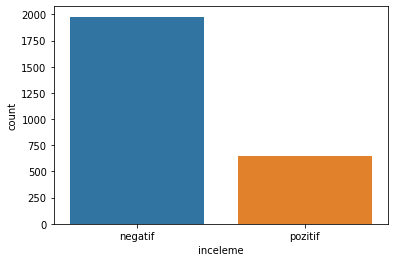

In [33]:
sns.countplot(df_Tweets.Tweets_duygu)
plt.xlabel('inceleme');

# **Pasta histogram ile gösterilmesi**

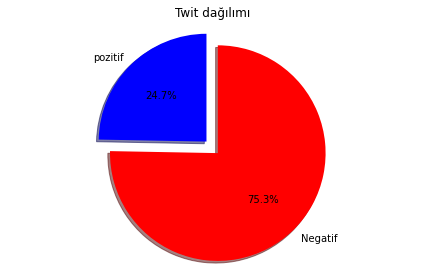

In [42]:

pozitif = (df_Tweets['Tweets_duygu'] == 'pozitif').sum()
negatif = (df_Tweets['Tweets_duygu'] == 'negatif').sum()


proportions = [pozitif, negatif]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['pozitif', 'Negatif'],
    
    # with no shadows
    shadow =0.9,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Twit dağılımı")

# View the plot
plt.tight_layout()
plt.show()

# **Histogram olarak gösterilmesi**

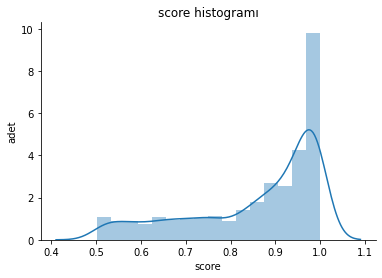

In [43]:
ttbill = sns.distplot(k);
ttbill.set(xlabel = 'score', ylabel = 'adet', title = "score histogramı")
sns.despine()

# TWEETLERİN SINFILANDIRILMASI 

Turk-bert modellerinin yüklenmesi

In [44]:
#Tweet

In [45]:
tokenizer= AutoTokenizer.from_pretrained("savasy/bert-turkish-text-classification")
model= AutoModelForSequenceClassification.from_pretrained("savasy/bert-turkish-text-classification")

In [47]:
sınıf=pipeline("text-classification", model=model, tokenizer=tokenizer)

In [49]:
code_to_label={
 'world': 'dunya ',
 'economy': 'ekonomi ',
 'culture': 'kultur ',
 'health': 'saglik ',
 'politics': 'siyaset ',
 'sport': 'spor ',
 'technology': 'teknoloji '}

In [52]:
Tweet[25]

'Sarat İttifakında gerilim MHP ve AKP arasındaki süreç en başa dönebilir  '

In [53]:
a = sınıf(Tweet[25])
a

[{'label': 'politics', 'score': 0.9948795437812805}]

In [54]:
a = sınıf(Tweet[25])
a = code_to_label[a[0]['label']]
a


'siyaset '

In [56]:
kategori= list()
for i in range(TweetSayisi):
                    c= sınıf(Tweet[i])
                    a = c[0]['label']
                    a = code_to_label[c[0]['label']]
                    #d =np.append(a)
                    kategori.append(a)

In [57]:
#kategori

In [59]:
kategori
df_Tweets["sınıflandırma"]= pd.DataFrame(kategori)
#df_Tweetler["Tweets_duygu"]=df_Tweetler["Tweets"].map(lambda x: "".join(d))


In [60]:
df_Tweets

,hour,tweet,Tweets_duygu,sınıflandırma
0,21,Ünlülerin eğlencesine polis baskını,negatif,saglik
1,21,Boşandığı kadını öldüresiye döven İbrahim Zara...,negatif,dunya
2,21,GAP gümrük kapılarında milyon liralık kaçak e...,negatif,ekonomi
3,21,Çamlıca Kulesine giriş ücreti ve kaferestoran ...,pozitif,kultur
4,21,Doğrusunu benden duyun dedi ve açıkladı Şeyma ...,negatif,siyaset
...,...,...,...,...
2622,00,En çok vaka düşüşü yaşanan kentte pazarcılarda...,negatif,saglik
2623,00,Hindistanda Covid salgında yeni rekor son saa...,negatif,dunya
2624,00,İzmirde kişinin öldüğü olayla ilgili tutukla...,pozitif,siyaset
2625,00,Alkollü sürücü dur ihtarına uymadı otomobili p...,negatif,spor


# Sonuc

In [64]:
sonuciki = df_Tweets["sınıflandırma"].value_counts()
sonuciki

siyaset       1388
saglik         317
kultur         270
dunya          213
ekonomi        210
teknoloji      128
spor           101
Name: sınıflandırma, dtype: int64

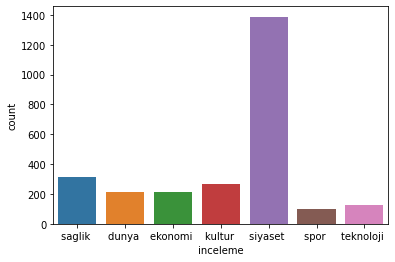

In [62]:
sns.countplot(df_Tweets.sınıflandırma)
plt.xlabel('inceleme');

In [63]:
df_Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hour           2627 non-null   object
 1   tweet          2627 non-null   object
 2   Tweets_duygu   2627 non-null   object
 3   sınıflandırma  2627 non-null   object
dtypes: object(4)
memory usage: 82.2+ KB


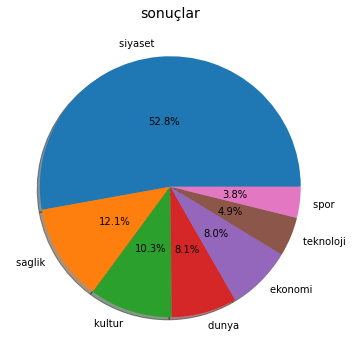

In [71]:
pie, ax = plt.subplots(figsize=[10,6])
labels = sonuciki.keys()
plt.pie(x=sonuciki, autopct="%.1f%%", explode=None, labels=labels,shadow =15, pctdistance=0.5)
plt.title("sonuçlar", fontsize=14);

In [72]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [75]:
df_Tweets.to_csv('SonData.csv')
!cp SonData.csv "drive/My Drive/"

[***Evet arkdaşlar sona geldiniz bi starınız alırım... :) İşinize yaradıysa ne mutlu bana..kolay gelsin***](https://github.com/alperbayram/Turkish-NLP-examples)